In [1]:
from model import *
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print(i, flush=True)

9


In [11]:
model = RegionModel(
    international_trade = True
    ,max_eff = 1.3 #0.5
    ,eutax = 0.1s
    ,neighbor_influence = 0
    ,tax_influence = 0.05
    ,member_trade_multiplier = 1.3
    ,randomness = 0
    ,eu_strategy = "default"
)

for _ in range(500):
    model.step()
    print(model.member_count, model.other_count)
    clear_output(wait=True)

312 8


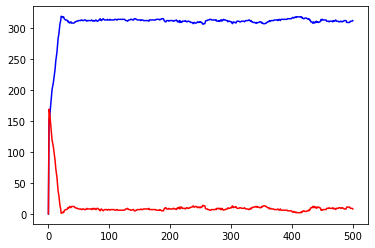

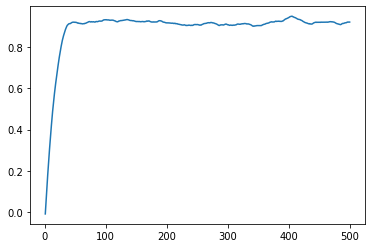

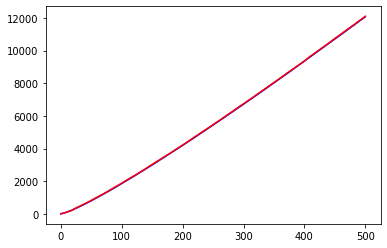

In [12]:
df = model.datacollector.get_model_vars_dataframe()
plt.plot(df["member_count"], color="blue")
plt.plot(df["other_count"], color="red")
plt.show()

plt.plot(df["average_cooperativeness"])
plt.show()

plt.plot(df["member_wealth"], color="blue")
plt.plot(df["other_wealth"], color="red")
plt.show()

In [16]:
df

,member_count,other_count,average_cooperativeness,other_wealth,total_wealth,member_wealth,other_eff,total_eff,member_eff
0,0,0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
1,172,148,0.034274,1.017259e+00,1.016959e+00,1.016700e+00,0.015974,0.015431,0.014964
2,177,143,0.048712,1.034714e+00,1.034216e+00,1.033815e+00,0.015887,0.015431,0.015064
3,182,138,0.061837,1.052416e+00,1.051923e+00,1.051549e+00,0.015833,0.015431,0.015127
4,185,135,0.072899,1.071649e+00,1.069926e+00,1.068669e+00,0.016064,0.015431,0.014970
...,...,...,...,...,...,...,...,...,...
1606,259,61,0.348927,1.209662e+20,2.408763e+19,1.270663e+18,0.027298,0.015431,0.012637
1607,259,61,0.347052,1.245977e+20,2.481416e+19,1.313013e+18,0.027298,0.015431,0.012637
1608,258,62,0.348833,1.263136e+20,2.555395e+19,1.340385e+18,0.027261,0.015431,0.012589
1609,259,61,0.346677,1.321647e+20,2.631808e+19,1.388943e+18,0.027298,0.015431,0.012637


In [3]:
a1 = model.agents[0]
a2 = model.agents[1]

In [10]:
# model.step()
# for agents in model.agents:
#     # agents.step()
#     # agents.choose_strategy()
#     # agents.update_wealth
#     neighbor = agents.get_neighbor()
#     # agents.interact(neighbor)
#     agents.CC(neighbor)
#     # self.update_cooperativeness(neighbor)

In [8]:
a1.model.basic_trade_reward

0.2

In [13]:
model.calculate_benefit()

ZeroDivisionError: division by zero

In [24]:
a2.cooperativeness

0.307982750577805

In [25]:
# a1.CC(a2)
a1.DD(a2)

0
0
-0.20736
-0.20736


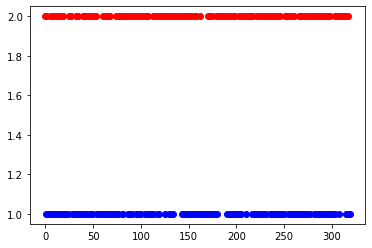

In [26]:
plt.scatter([a.unique_id for a in model.agents if a.strategy == 2], [a.strategy for a in model.agents if a.strategy == 2], color="red")
plt.scatter([a.unique_id for a in model.agents if a.strategy == 1], [a.strategy for a in model.agents if a.strategy == 1], color="blue")


In [60]:
model.step()
model.datacollector.get_model_vars_dataframe()

,collaborator_count,defector_count,av_coop,other_wealth,total_wealth,member_wealth
0,156,164,NaN,0,0,0
1,156,164,-0.015935,164,320,156
2,156,164,-0.015935,328,640,312
3,156,164,-0.015935,492,960,468
4,156,164,-0.015935,656,1280,624
5,156,164,-0.015935,820,1600,780
6,156,164,-0.015935,984,1920,936
7,156,164,-0.015935,1148,2240,1092
8,156,164,-0.015935,1312,2560,1248
9,156,164,-0.015935,1476,2880,1404
